# Complaints against Police in Philadelphia

### Author:
##### Lindsey Morris

### Description:
##### As part of the Philadelphia Police Department's (PPD) accountability processes, PPD publishes three datasets: The Complaints Against Police (CAP) dataset documents the civilian complaints alleging police misconduct; the CAP Findings dataset provides demographic details of the police officer involved, the allegations, and the status of the PPD's Internal Affairs Division's investigation of and findings (if available) about the allegation; and the Complainant Demographics dataset shows the race, sex, and age of each person who filed a complaint against a police officer by complaint number. All three datasets are available on Open Data Philly. 

##### In <a href="https://www.phillypowerresearch.org/news/2022/3/23/philadelphia-police-a-history-of-brutality">Philadelphia Police: A History of Brutality</a>, the authors provide a detailed history of how police forces have consistently abused their power in Philadelphia.The post is part of a series exploring how Philadelphia can invest in communities to improve public safety instead of investing in policing. As an abolitionist, I would like to explore a narrative of the potential for community investment, as well as divestment from police in the Logan Triangle for our proposal to the APA. 


##### This notebook examines and maps geographic trends of the Complaints Against Police (CAP) dataset across Philadelphia. Then, the 35th police district which encapsulates the majority of Philadelphia's Logan neighborhood is isolated in the dataset to determine how CAP in the 35th district compare to the rest of Philadelphia. It's worth noting that the CAP Dataset only contains complaints from December 2016 through current day.

Begin by importing all libraries needed

In [113]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import contextily as ctx

Then, load a data file from Week 4 of my repo

In [114]:
df = pd.read_csv('complaints.csv')

Add a new column to account for complaint count

In [115]:
df['Complaint Count'] = 1

create new column where df['District'] is transformed into .astype(str)
plot histogram using value_counts per new district column

In [116]:
# create a new column with the district information cast as string
df["District_str"] = df["District"].astype(str)

Inspect size of the data

In [117]:
df.shape

(3621, 8)

The output above shows that there are 3621 rows and 7 columns in the dataset.

View the first five rows of data below.

In [118]:
df.head()

,Incident Date,Complaint ID,Date Received,District,Classification,Summary,Complaint Count,District_str
0,NaN,17-0127,2017-03-22 04:00:00+00,1,LACK OF SERVICE,"According to the complainant, in February 2016...",1,1
1,3/19/17,17-0131,2017-03-28 04:00:00+00,1,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 3-19-17 at 2:...",1,1
2,3/22/17,17-0142,2017-04-03 04:00:00+00,1,DEPARTMENTAL VIOLATIONS,"According to the complaint, on 3-22-17 at 5:00...",1,1
3,4/23/17,17-0204,2017-05-01 04:00:00+00,1,PHYSICAL ABUSE,"According to the complainant, on 4-23-17 at 7:...",1,1
4,4/17/17,17-0214,2017-05-04 04:00:00+00,1,DEPARTMENTAL VIOLATIONS,"According to the complaint, on 4-17-17 at 11:3...",1,1


Confirm the complaints dataset has the correct data types below.

In [119]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Incident Date    3377 non-null   object
 1   Complaint ID     3621 non-null   object
 2   Date Received    3621 non-null   object
 3   District         3621 non-null   int64 
 4   Classification   3621 non-null   object
 5   Summary          3621 non-null   object
 6   Complaint Count  3621 non-null   int64 
 7   District_str     3621 non-null   object
dtypes: int64(2), object(6)
memory usage: 226.4+ KB


All looks correct! According to this information, there have been 3622 complaints against police since 2016. 

Check for any null columns

In [120]:
df.columns[df.isna().all()].tolist()

[]

all clear!

Philadelphia has 21 districts that are labeled in a confusing manner. Despite their only being 21 police districts, numbers are skipped along the way. For example, the district count jumps from 19th to 22nd district, and 35th to 39th district. Furthermore, the Philadelphia Airport is given it's own 77th district, which ultimately makes up the 22nd district. 

Collapse the District column to get a summary of the rows

Plot the complaint count for each police district as a histogram

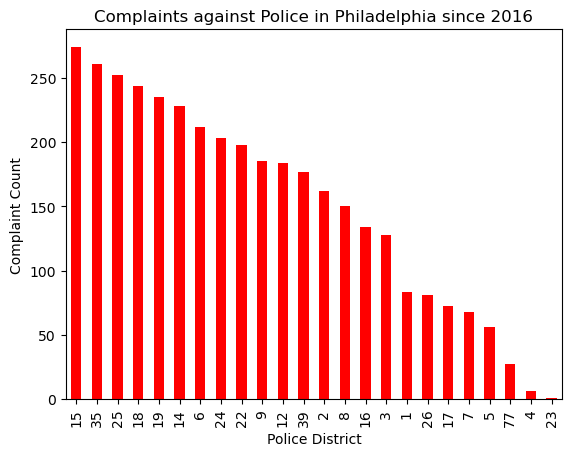

In [121]:
# plot histogram of value counts of the new column
df["District_str"].value_counts().plot(kind="bar", color= 'red')
plt.xlabel("Police District")
plt.ylabel("Complaint Count")
plt.title("Complaints against Police in Philadelphia since 2016")
plt.show()

The histogram above shows that several districts have significanty more police complaints than others. As previously mentioned the 77th district on the far right represents the airport. As pirctured, the Logan Neighborhood, located in the 35th district has the 2nd highest CAP count since 2016.

Now, let's view the numerical data on how many complaints each district has. 

In [122]:
#count complaint values by district and save as df
counts = df.value_counts(["District"]).reset_index(name= 'count')
(counts)

,District,count
0,15,274
1,35,261
2,25,252
3,18,244
4,19,235
5,14,228
6,6,212
7,24,203
8,22,198
9,9,185


Now, let's visualize this data on a map. First, the police district boundaries shapefile needs to be read.

In [123]:
# read district geojson file
gdf = gpd.read_file("districts.geojson")

Let's see what the geojson contains.

In [124]:
gdf.head()

,OBJECTID,AREA,PERIMETER,DISTRICT_,DISTRICT_ID,DIST_NUM,SUM_AREA,DIST_NUMC,LOCATION,PHONE,DIV_CODE,AREA_SQMI,Shape__Area,Shape__Length,geometry
0,343,None,69282.588463,16,None,16,None,16,39th St. & Lancaster Ave.,686-3160,SWPD,1.216700e+08,1.927226e+07,27575.079183,"POLYGON ((-75.19957 40.00912, -75.19799 40.008..."
1,344,None,33150.154961,17,None,17,None,17,20th St. & Federal St.,686-3170,SPD,5.786368e+07,9.154950e+06,13179.953350,"POLYGON ((-75.16599 39.94184, -75.16621 39.940..."
2,345,None,54403.930038,18,None,18,None,18,55th St. & Pine St.,686-3180,SWPD,9.881929e+07,1.564117e+07,21629.610687,"POLYGON ((-75.18466 39.94851, -75.18633 39.947..."
3,346,None,51597.051603,35,None,35,None,35,N. Broad St. & Champlost St.,686-3350,NWPD,1.544309e+08,2.450685e+07,20554.869138,"POLYGON ((-75.13011 40.05789, -75.12898 40.057..."
4,347,None,58075.014444,39,None,39,None,39,22nd St. & Hunting Park Ave.,686-3390,NWPD,1.578976e+08,2.503787e+07,23123.580262,"POLYGON ((-75.17892 40.03175, -75.17782 40.031..."


The output above provides a variety of information about each police district, including a phone number, a physical adress, and the geometry of each district.

Now, let's plot the police district geojson file.

<AxesSubplot: >

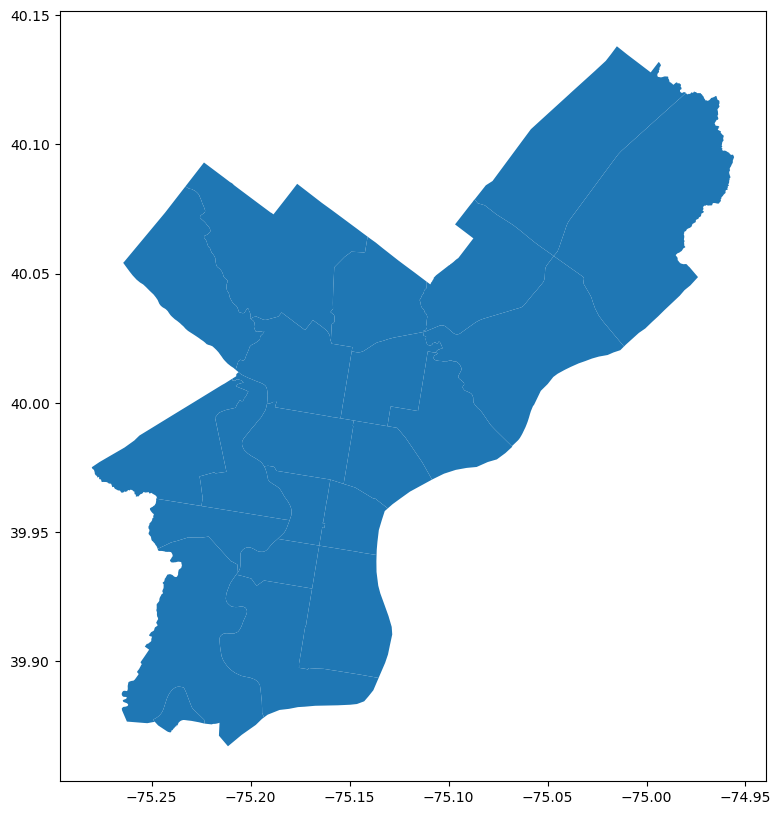

In [125]:
gdf.plot(figsize=(12,10))

In [126]:
gdf.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       22 non-null     int64   
 1   AREA           0 non-null      object  
 2   PERIMETER      22 non-null     float64 
 3   DISTRICT_      22 non-null     int64   
 4   DISTRICT_ID    0 non-null      object  
 5   DIST_NUM       22 non-null     int64   
 6   SUM_AREA       0 non-null      object  
 7   DIST_NUMC      22 non-null     object  
 8   LOCATION       22 non-null     object  
 9   PHONE          22 non-null     object  
 10  DIV_CODE       22 non-null     object  
 11  AREA_SQMI      22 non-null     float64 
 12  Shape__Area    22 non-null     float64 
 13  Shape__Length  22 non-null     float64 
 14  geometry       22 non-null     geometry
dtypes: float64(4), geometry(1), int64(3), object(7)
memory usage: 2.7+ KB


Only district and geometry are needed, so let's subset the data

In [127]:
#subset data
gdf2 = gdf[['DIST_NUM','geometry']]

#confirm data subset is correct
gdf2.head()

,DIST_NUM,geometry
0,16,"POLYGON ((-75.19957 40.00912, -75.19799 40.008..."
1,17,"POLYGON ((-75.16599 39.94184, -75.16621 39.940..."
2,18,"POLYGON ((-75.18466 39.94851, -75.18633 39.947..."
3,35,"POLYGON ((-75.13011 40.05789, -75.12898 40.057..."
4,39,"POLYGON ((-75.17892 40.03175, -75.17782 40.031..."


Looks good!

In order to merge the complaints dataset with the district boundary geojson file, the columns we are merging from the files should have the same name. So, let's rename "DIST_NUM".

In [128]:
columns = list(gdf2)
columns

['DIST_NUM', 'geometry']

In [129]:
# Rename the column
gdf2.columns = ['District', 'geometry']

# Save the modified geojson
gdf.to_file("districts.geojson")

In [130]:
#confirm data subset is correct
gdf2.head()

,District,geometry
0,16,"POLYGON ((-75.19957 40.00912, -75.19799 40.008..."
1,17,"POLYGON ((-75.16599 39.94184, -75.16621 39.940..."
2,18,"POLYGON ((-75.18466 39.94851, -75.18633 39.947..."
3,35,"POLYGON ((-75.13011 40.05789, -75.12898 40.057..."
4,39,"POLYGON ((-75.17892 40.03175, -75.17782 40.031..."


District column was renamed correctly.

Now, we should be able to merge the complaints dataset and the district boundary geojson file.

In [131]:
# Merge the dataframe and GeoDataFrame on a common field
merged = gdf2.merge(counts, on='District')

In [132]:
# get info for our merged data
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   District  22 non-null     int64   
 1   geometry  22 non-null     geometry
 2   count     22 non-null     int64   
dtypes: geometry(1), int64(2)
memory usage: 704.0 bytes


In [133]:
#check if the new dataframe looks right
merged.head()

,District,geometry,count
0,16,"POLYGON ((-75.19957 40.00912, -75.19799 40.008...",134
1,17,"POLYGON ((-75.16599 39.94184, -75.16621 39.940...",72
2,18,"POLYGON ((-75.18466 39.94851, -75.18633 39.947...",244
3,35,"POLYGON ((-75.13011 40.05789, -75.12898 40.057...",261
4,39,"POLYGON ((-75.17892 40.03175, -75.17782 40.031...",177


With the output above, we can see that the datasets have been merged.

Now let's try plotting the data.

(-75.2965363338824, -74.939522217298, 39.853475402027584, 40.15148900478962)

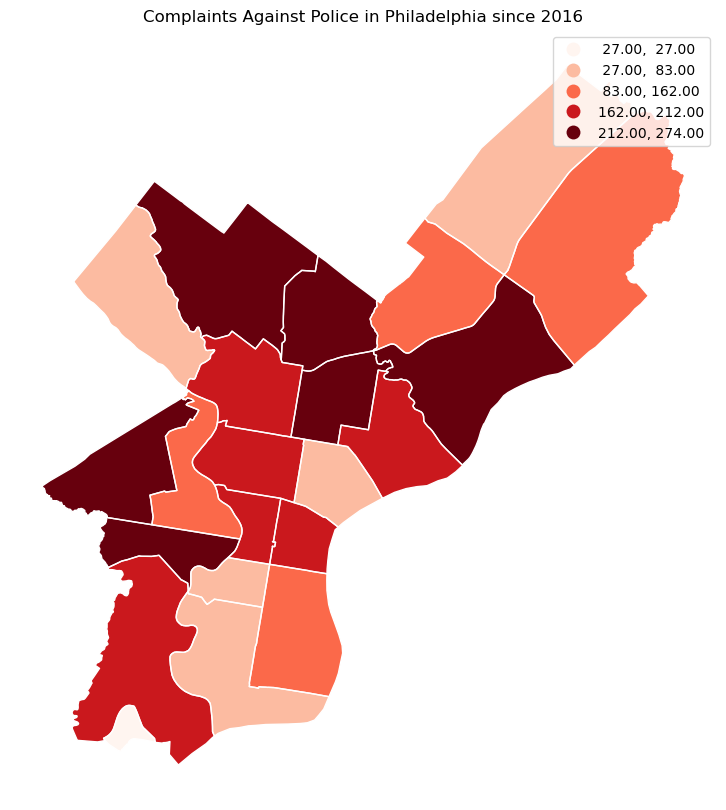

In [134]:
# Plot the merged GeoDataFrame
fig, ax = plt.subplots(figsize= (10,10))
merged.plot(ax=ax, column='count', cmap='Reds', scheme='fisher_jenks', legend=True)
merged.plot(ax=ax, facecolor='none', edgecolor='white')

# Add a title and axis labels
ax.set_title("Complaints Against Police in Philadelphia since 2016")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

#get rid of numbers on bottom of map
ax.axis('off')

The chloropleth map above shows that CAP counts are significantly higher in some police districts other others. It would be interesting to explore how this map coorelates to other indicators my group has explored such as poverty and unemployment rates, as well as racial demographic data.